In [1]:
import torch
from torch_geometric.data import Data, DataLoader
from cnf import BipartiteData
from loss import SimpleLossCompute, SimpleLossCompute2, push_to_side
import time
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yangzhiping/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# add a folder raw under dataset manually before execute this chunk
from data import SATDataset
ds = SATDataset('../dataset', 'RND3SAT/uf50-218', False)
last_trn, last_val = int(len(ds)), int(len(ds))
train_ds = ds[: last_trn]
valid_ds = ds[last_trn: last_val]
test_ds = ds[last_val:]

Satisfied Cases ...
Extracting ../dataset/raw/uf50-218.tar.gz
processing uf50-0922.cnf: 100%|██████████| 1000/1000 [00:02<00:00, 335.30it/s]
Done!


In [4]:
test_data = train_ds[1]
edge_index_pos = test_data.edge_index_pos
edge_index_neg = test_data.edge_index_neg
variable_count = max(max(edge_index_pos[1]), max(edge_index_neg[1])) + 1
clause_count = len(edge_index_pos[1])

# Debug for loss.py

In [9]:
def test_loss(iter_num, par_sm, par_sg, var_num, plot=False):
    loss_func = SimpleLossCompute(par_sm, par_sg, debug=True)
    loss_func2 = SimpleLossCompute2(par_sm, par_sg, debug=True)
    sat_rate = np.zeros(iter_num)
    loss_v = np.zeros(iter_num)
    loss2_v = np.zeros(iter_num)
    time1 = np.zeros(iter_num)
    time2 = np.zeros(iter_num)
    for i in range(iter_num):
        x_s = push_to_side(torch.rand(var_num, 1), par_sg)
        start = time.time()
        loss, sm = loss_func(x_s, edge_index_pos, edge_index_neg)
        time1[i] = time.time() - start
        satisfied_percentage = sum(sm > 0.5).numpy() / clause_count
        loss_v[i] = loss

        start = time.time()
        loss2, sm2 = loss_func2(x_s, edge_index_pos, edge_index_neg)
        time2[i] = time.time() - start
        loss2_v[i] = loss2
        if sum(sm > 0.5).numpy() / clause_count != satisfied_percentage:
            raise ValueError("Two loss should return same sm")
        sat_rate[i] = satisfied_percentage
    if plot:
        plt.plot(sat_rate, loss_v, "ro")
        plt.xlabel("Satisfied Clauses / Numer of Clauses")
        plt.ylabel("Loss")
    return sat_rate, loss_v, loss2_v, time1, time2

Time for loss1 and loss2 to compute loss of 5000 FG respectively takes 18.656435251235962s


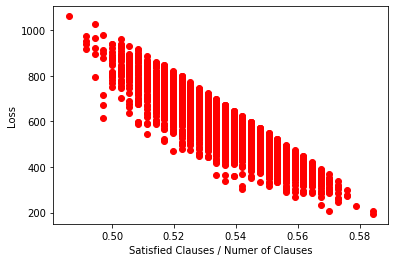

In [10]:
start = time.time()
sat_rate, loss_v, loss2_v, time1, time2 = test_loss(5000, 30, 50, variable_count, plot=True)
span = time.time() - start
print(f"Time for loss1 and loss2 to compute loss of 5000 FG respectively takes {span}s")

In [7]:
ave_time_diff = sum(time1 - time2) / 5000
print(ave_time_diff)
print(min(loss_v))
print(time1[0:10])
print(time2[0:10])

-3.983135223388672e-05
176.402099609375
[0.08077502 0.00021601 0.000211   0.00021482 0.00020909 0.0003159
 0.00021982 0.00023603 0.000211   0.00023675]
[0.00030994 0.00026011 0.00026107 0.00025702 0.00026011 0.0002718
 0.00031805 0.00026321 0.00025797 0.00026417]


# Debug for models.py

In [8]:
import models

## sample a test data

In [9]:
test_data = train_ds[1]
edge_index_pos = test_data.edge_index_pos
edge_index_neg = test_data.edge_index_neg
xv = # TODO
xc = # TODO
variable_count = max(max(edge_index_pos[1]), max(edge_index_neg[1]))+1
clause_count = len(edge_index_pos[1])

SyntaxError: invalid syntax (<ipython-input-9-1959d0894c1d>, line 4)

## Initialize a model and to make it run through

In [ ]:
layer_encoder = #TODO: Import layers and fill in here
num_layers_en = #TODO
layer_decoder = #TODO: Import layers and fill in here
num_layers_de = #TODO
encoder = models.Encoder(layer_encoder, num_layers_en) 
decoder = models.Decoder(layer_decoder, num_layers_de) 
model = models.GraphTransformer(encoder, decoder)
literal_assignment = model(xv, xc, edge_index_pos, edge_index_neg)
loss_func = loss_func = SimpleLossCompute(par_sm, par_sg, "cuda")
loss_of_this_assignent = loss_func(x_s, edge_index_pos, edge_index_neg)

# After finish model.py, debug train.py